## Fashion class classification - Studying from Udemy

#### Shruti Bhutaiya

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Ive already downloaded the data : Simply search on google about fashion mnist dataset
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
#Create array from dataframe
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

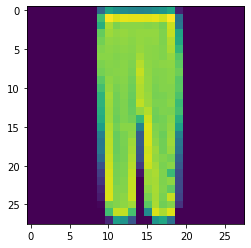

In [4]:
#Just to check a demo - random is easy to use for running everytime diff images
i = random.randint(1,60000)
plt.imshow( training[i,1:].reshape((28,28)))

In [5]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
label = training[i,0]
label

1.0

## Training

In [6]:
# Dividing by 255 for scaling the values between 0 to 1 range
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [8]:
X_train.shape

(48000, 784)

In [9]:
# Here, the image data array is not in shape of (28x28x1). So, we have to convert it
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [10]:
X_train.shape

(48000, 28, 28, 1)

In [11]:
#We are using Keras now
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [12]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [13]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [14]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 49s 1ms/step - loss: 0.8032 - acc: 0.7022 - val_loss: 0.5063 - val_acc: 0.8161
Epoch 2/50
48000/48000 [==============================] - 43s 889us/step - loss: 0.4428 - acc: 0.8455 - val_loss: 0.4194 - val_acc: 0.8506
Epoch 3/50
48000/48000 [==============================] - 43s 896us/step - loss: 0.3965 - acc: 0.8620 - val_loss: 0.3840 - val_acc: 0.8628
Epoch 4/50
48000/48000 [==============================] - 43s 902us/step - loss: 0.3583 - acc: 0.8741 - val_loss: 0.3406 - val_acc: 0.8797
Epoch 5/50
48000/48000 [==============================] - 42s 880us/step - loss: 0.3354 - acc: 0.8820 - val_loss: 0.3255 - val_acc: 0.8880
Epoch 6/50
48000/48000 [==============================] - 43s 887us/step - loss: 0.3221 - acc: 0.8866 - val_loss: 0.3385 - val_acc: 0.8818
Epoch 7/50
48000

Epoch 46/50
48000/48000 [==============================] - 44s 918us/step - loss: 0.1390 - acc: 0.9508 - val_loss: 0.2427 - val_acc: 0.9167
Epoch 47/50
48000/48000 [==============================] - 44s 926us/step - loss: 0.1400 - acc: 0.9494 - val_loss: 0.2427 - val_acc: 0.9175
Epoch 48/50
48000/48000 [==============================] - 44s 919us/step - loss: 0.1376 - acc: 0.9503 - val_loss: 0.2438 - val_acc: 0.9179
Epoch 49/50
48000/48000 [==============================] - 44s 924us/step - loss: 0.1352 - acc: 0.9516 - val_loss: 0.2483 - val_acc: 0.9152
Epoch 50/50
48000/48000 [==============================] - 44s 923us/step - loss: 0.1341 - acc: 0.9515 - val_loss: 0.2449 - val_acc: 0.9165


## Evaluating the model

In [15]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 138us/step
Test Accuracy : 0.918


In [16]:
predicted_classes = cnn_model.predict_classes(X_test)

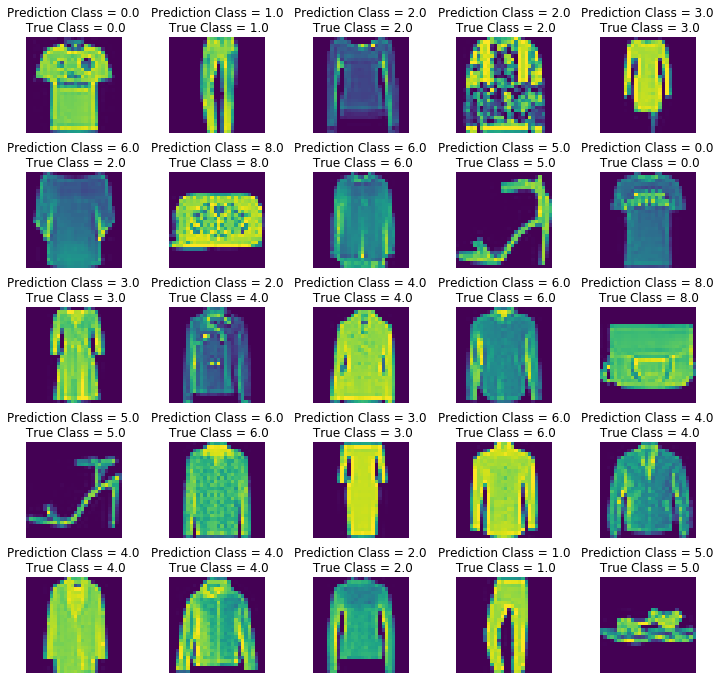

In [17]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


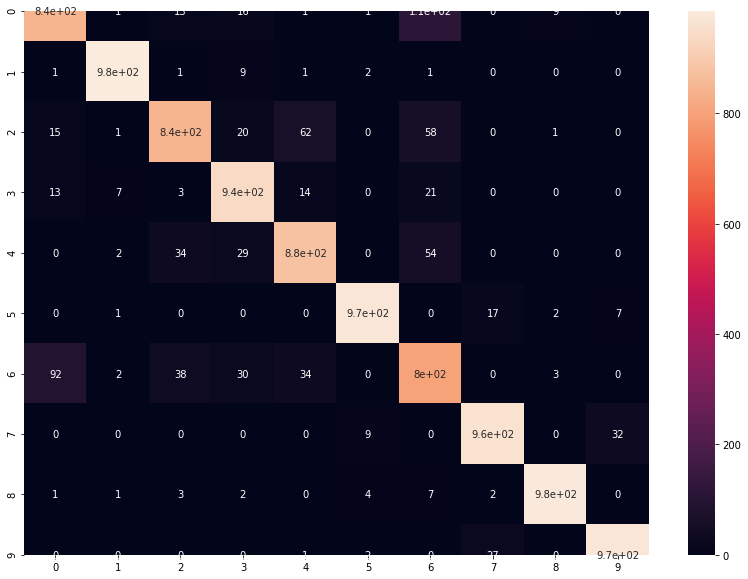

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [19]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.90      0.84      0.87      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.89      0.88      0.88      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.76      0.80      0.78      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

